# INFO 6105 - Data Science Method and Tools

# Data Analysis and Prediction of Wine color and its quality using ML

# Report Summary

1. **Problem Statement**

2. **Understanding the dataset**

3. **Importing packages**

4. **Loading and reading the dataset**

5. **Exploratory Data Analysis**<br>
    - Statistical analysis of features
    - Visualize relationship among features
    - Checking Correlation
    - Checking Outliers
    
5. **Data Preprocessing** 
    - Handling Null values 
    - Remove Outliers
    - Label Encoding
    - Normal Distribution - QQ test
    - Remove Multicollinearity

6.  **Model Training and Testing**<br>
    ***Wine Color Prediction : Binary Classification***
    - Model 1 : Logistic Regression
    - Model 2 : Naive Bayes
    
    ***Wine Quality Prediction : Multi Class Classifcaiton***
    - Model 1 : Decision Tree
      - Handling Imbalanced Data
    - Model 2: Random Forest
      - Feature Selection - Feature Importance
      - Hypertuning - GridSearchCV
      
7. **Conclusion**
8. **References**

## Problem statement -

- Taking all the given features (chemicals), determine if the quality of the wine is low, medium or high and whether it is a red or white wine.


## Understanding the dataset

Dataset source : https://www.kaggle.com/datasets/rajyellow46/wine-quality

### What is Wine?
- Quite simply, wine is fermented grape juice. Grapes are crushed to release their sugary liquid, then alcoholic fermentation changes the grape juice into an alcoholic beverage.

### Wine exists majorly in 2 colors
- Red wine is a type of wine made from dark-colored grape varieties. The color of the wine can range from intense violet, typical of young wines, through to brick red for mature wines and brown for older red wines. The juice from most purple grapes is greenish-white, the red color coming from anthocyan pigments present in the skin of the grape. Much of the red wine production process involves extraction of color and flavor components from the grape skin.

- White wine is a wine that is fermented without skin contact. The colour can be straw-yellow, yellow-green, or yellow-gold. It is produced by the alcoholic fermentation of the non-coloured pulp of grapes, which may have a skin of any colour. White wine has existed for at least 4,000 years.

### Explaining each of the dataset features
##### Fixed Acidity
- The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. Wines lacking in acid are "flat." Chemically the acids influence titrable acidity which affects taste and pH which affects color, stability to oxidation, and consequantly the overall lifespan of a wine

##### Volatile Acidity 
- Volatile acidity (VA) is a measure of the wine's volatile (or gaseous) acids. The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

##### Citric Acid
- Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability.

##### Residual Sugar
- Sweetness in wine is called residual sugar and is usually measured in grams per litre (g/L). Residual sugar or 'RS' is from the natural grape sugars left in a wine after the alcoholic fermentation finishes. The more residual sugar remaining in a wine, the sweeter the wine is.

##### Chlorides
- Wine contains from 2 to 4 g L–1 of salts of mineral acids, along with some organic acids, and they may have a key role on a potential salty taste of a wine, with chlorides being a major contributor to saltiness.

##### Free Sulphur dioxide
- The free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties. It prevents microbial growth and the oxidation of wine.

##### Total Sulphur dioxide
-  Total SO2 is the amount of free and bound forms of S02.I low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

##### Density
- Density can be used to measure the sugar concentration (Brix) in grape juice or other fruit juice (must) prior to crush and throughout the fermentation process. Te density of water is close to that of water depending on the percent alcohol and sugar content.

##### pH
- If the pH is higher, the wine will be softer and rounder, and if the pH is lower, it will feel more linear. It describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

##### Sulphates
- Wine is fermented using yeast, which produces sulfites, so almost all wine contains sulfites. It is also a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

##### Alcohol
- Alcohol in wine is as important an element in the final product as the grape itself. It doesn't just effect how you feel after drinking it. It effects the taste, texture, and structure of the wine itself. Alcoholic strength is the ethanol (the main product of fermentation) in wine. Wine can have anywhere between 5% and 23% ABV. The average alcohol content of wine is about 12%. This amount varies depending on the variety of wine, as well as the winemaker and their desired ABV.

##### quality: 
- Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

## importing packages

In [203]:
import time
import numpy as np #to work with numerical data
import pandas as pd #to work with dataframe
import math #to perform calculations
import seaborn as sns #for visualization (plotting)
from matplotlib import pyplot as plt #for visualization (plotting)
%matplotlib inline
from sklearn import metrics #tree #to get performance metrics
from sklearn.preprocessing import LabelEncoder #to perform label encoding of data
from sklearn.model_selection import GridSearchCV #to perform hyper parameter tuning
from sklearn.model_selection import train_test_split #function that automatically splits data for training and testing
from sklearn.metrics import accuracy_score #to evaluate the performance of model
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.tree import DecisionTreeClassifier #decision tree model
from sklearn.ensemble import RandomForestClassifier #Random Forest model
from sklearn.naive_bayes import GaussianNB # Naive Bayes model
from sklearn.metrics import confusion_matrix, classification_report #to get confusion matrix and classification report of trained model
from imblearn.over_sampling import SMOTE #to perform data re-balancing

## Load dataset

In [2]:
wine_df = pd.read_csv('winequalityN.csv')

Viewing the dataframe

In [3]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Number of rows and columns in the dataset

In [4]:
print("Number of rows : ",wine_df.shape[0])
print("Number of columns : ",wine_df.shape[1])

Number of rows :  6497
Number of columns :  13


Display the top 5 rows of each column - useful for viewing limited data

In [5]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Create a new column - 'quality_level' 

It is better to divide the quality as low, medium or high for easier understanding

- if quality is less than 5 - quality_label : 'low'
- if quality is between 5 and 7 inclusive - quality_label : 'medium'
- if quality is greater than 7 - quality_label : 'high'

In [6]:
wine_df['quality_level'] = wine_df.quality.apply(lambda ql: 'low' if ql <= 5 else 'medium' if ql <=7 else 'high')

Unique values in 'quality_level'

In [7]:
wine_df.quality_level.unique()

array(['medium', 'low', 'high'], dtype=object)

Drop 'quality' column to avoid redundancy

In [8]:
wine_df = wine_df.drop(['quality'],axis = 1)

The updated wine_df after adding column - 'qaulity_label'

In [9]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium


## Perform Exploratory Data Analysis
- Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns to spot anomalies to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Get statistical measures and essential details to understand the data better

### Statistics by wine color

In [10]:
redwine_stats = round(wine_df.loc[wine_df.type == 'red', wine_df.columns].describe(),2)
whitewine_stats = round(wine_df.loc[wine_df.type == 'white', wine_df.columns].describe(),2)
pd.concat([redwine_stats, whitewine_stats], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1597.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1598.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1598.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1597.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1597.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4890.0    6.86   0.84   
volatile acidity       0.64    1.58                4891.0    0.28   0.10   
citric acid            0.42    1.00                4896.0    0.33   0.12   
residual sugar         2.60   15.50                4896.0    6.39   5.07   
chlorides              0.09    0.61                4896.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4891.0    3.19   0.15   
sulphates              0.73    2.00                4896.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20

#### Observation - 
- Mean of residual sugar and total sulfur dioxide in white wine is much higher than in red wine.
- Both the wines have very low Chlorides mean and white wine has almost half of chlorides concentration than red wine.
- Ph is more in red wines compared to white wines, even though the difference is negligible
- Residual sugar, free sulphur dioxide and total sulphur dioxide in white wine have very large concentration compared to red wine.

### Statistics by wine quality

In [11]:
low_stats = round(wine_df[wine_df['quality_level'] == 'low'][wine_df.columns].describe(),2)
medium_stats = round(wine_df[wine_df['quality_level'] == 'medium'][wine_df.columns].describe(),2)
high_stats = round(wine_df[wine_df['quality_level'] == 'high'][wine_df.columns].describe(),2)
pd.concat([low_stats, medium_stats, high_stats], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

fixed acidity  volatile acidity  citric acid  \
Low Quality Wine    count        2379.00           2382.00      2383.00   
                    mean            7.33              0.40         0.30   
                    std             1.27              0.19         0.16   
                    min             4.20              0.10         0.00   
                    25%             6.50              0.26         0.21   
                    50%             7.10              0.34         0.29   
                    75%             7.80              0.50         0.40   
                    max            15.90              1.58         1.00   
Medium Quality Wine count        3911.00           3909.00      3913.00   
                    mean            7.16              0.31         0.33   
                    std             1.31              0.14         0.13   
                    min             3.80              0.08         0.00   
                    25%             6.40              0.21         0.26   
                    50%             6.90              0.27         0.31   
                    75%             7.60              0.36         0.39   
                    max            15.60              1.04         1.66   
High Quality Wine   count         197.00            198.00       198.00   
                    mean            6.85              0.29         0.33   
                    std             1.15              0.12         0.10   
                    min             3.90              0.12         0.03   
                    25%             6.20              0.21         0.28   
                    50%             6.80              0.28         0.32   
                    75%             7.30              0.35         0.37   
                    max            12.60              0.85         0.74   

                           residual sugar  chlorides  free sulfur dioxide  \
Low Quality Wine    count         2384.00    2383.00              2384.00   
                    mean             5.65       0.06                29.48   
                    std              4.92       0.04                19.84   
                    min              0.60       0.01                 2.00   
                    25%              1.80       0.04                14.00   
                    50%              2.90       0.05                26.00   
                    75%              8.52       0.08                42.00   
                    max             23.50       0.61               289.00   
Medium Quality Wine count         3913.00    3914.00              3915.00   
                    mean             5.33       0.05                30.96   
                    std              4.68       0.03                16.33   
                    min              0.70       0.01                 1.00   
                    25%              1.80       0.04                19.00   
                    50%              3.00       0.04                29.00   
                    75%              7.90       0.06                41.00   
                    max             65.80       0.42               112.00   
High Quality Wine   count          198.00     198.00               198.00   
                    mean             5.35       0.04                34.51   
                    std              4.16       0.02                17.08   
                    min              0.80       0.01                 3.00   
                    25%              2.00       0.03                24.00   
                    50%              4.05       0.04                34.00   
                    75%              7.57       0.04                43.00   
                    max             14.80       0.12               105.00   

                           total sulfur dioxide  density       pH  sulphates  \
Low Quality Wine    count               2384.00  2384.00  2381.00    2382.00   
                    mean                 119.28     1.00     3.21

#### Observation -
- The dataset has very less number of high quality wine, with medium quality being the most followed by low quality wine.
- Alcohol concentration increases as the quality of wine increases.
- Fixed, volatile acidity, chlorides decreases as the quality of wine increases.
- Amount of citric acid remains same for all qualities of wine.
- The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase in quality.

### Visualize the count of red wine and white wine with respect to each quality level of the wine

red wine count for each quality level

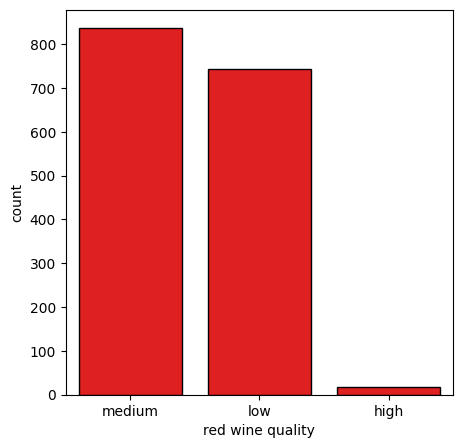

In [12]:
plt.figure(figsize=(5,5))
redwine_quality = wine_df.quality_level[wine_df.type == 'red'].value_counts() #count of red wine for each quality level

redwine_qualitylist = (list(redwine_quality.index), list(redwine_quality.values))
sns.barplot(x=redwine_qualitylist[0], y=redwine_qualitylist[1], color='red', edgecolor='black', linewidth=1)
plt.xlabel('red wine quality')
plt.ylabel('count')
plt.show()

#### Observation -
- There exists very few red wine with high quality
- Most of the red wine is either of low or medium quality

White wine count for each quality level

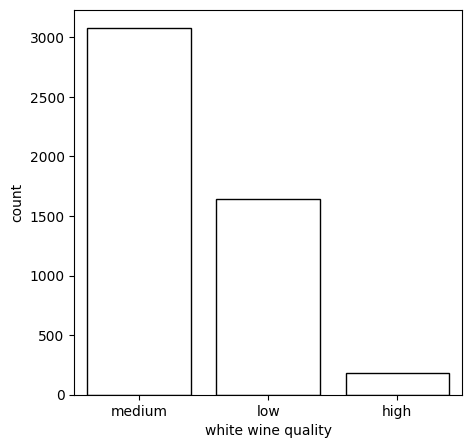

In [13]:
plt.figure(figsize=(5,5))
whitewine_quality = wine_df.quality_level[wine_df.type == 'white'].value_counts() #count of white wine for each quality level

whitewine_qualitylist = (list(whitewine_quality.index), list(whitewine_quality.values))
sns.barplot(x=whitewine_qualitylist[0], y=whitewine_qualitylist[1], color='white', edgecolor='black', linewidth=1)
plt.xlabel('white wine quality')
plt.ylabel('count')
plt.show()

#### Observation -
- There exists very few white wine with high quality
- There exists a large number of white wine with medium quality

### Visualize count of each classes in Wine quality level

Category plot using seaborn

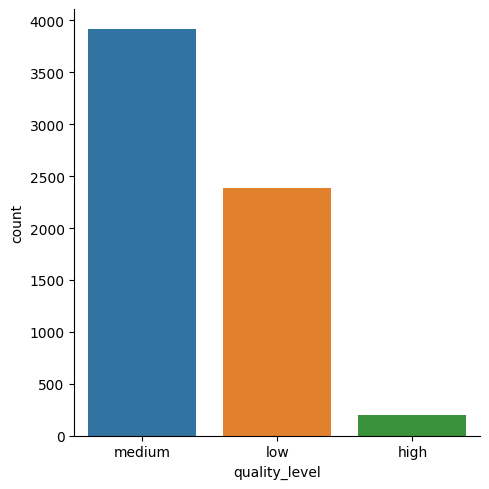

In [14]:
sns.catplot(x='quality_level' , data = wine_df , kind = 'count')

Display count of each category in quality level column

In [15]:
wine_df.quality_level.value_counts()

medium    3915
low       2384
high       198
Name: quality_level, dtype: int64

Observation - majority of the quality is in medium range (6 - 7)

# FInd relationship between quality level and each of the features

### Visualize quality level vs fixed acidity using bar plot

<AxesSubplot: xlabel='quality_level', ylabel='fixed acidity'>

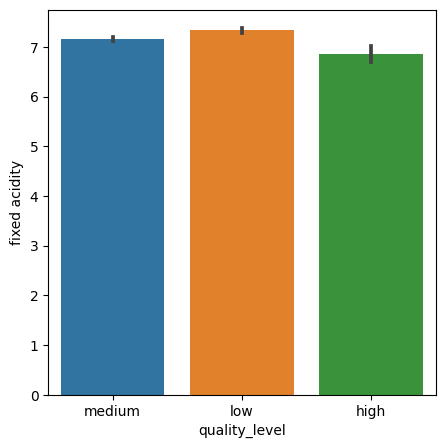

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality_level', y='fixed acidity', data=wine_df)

Observation 
- all 3 quality levels have almost equal amount of fixed acidity
- fixed acidity is maximum for all quality level
- as quality level increases, fixed acidity minutely decreases

### Visualize quality level vs volatile acidity using scatter plot

<AxesSubplot: xlabel='quality_level', ylabel='volatile acidity'>

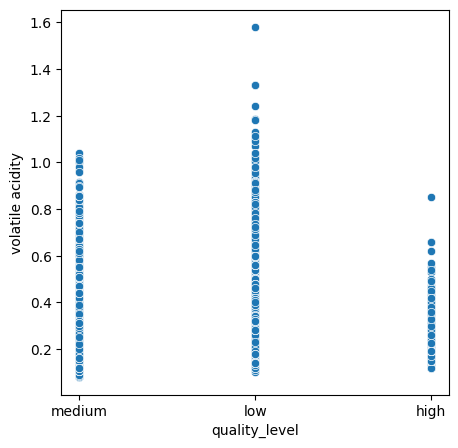

In [17]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality_level', y='volatile acidity', data=wine_df)

Observation -
- quality level and volatile acidity are inversely proportional to each other
- when volatile acidity increases , quality level decreases and vice versa

### Visualize quality level vs citric acid using bar plot

<AxesSubplot: xlabel='quality_level', ylabel='citric acid'>

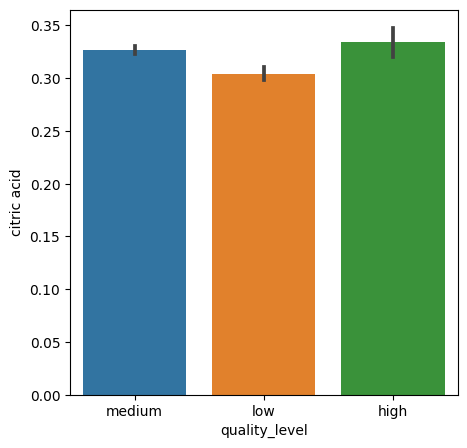

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality_level', y='citric acid', data=wine_df)

Observation 
- all 3 quality levels have almost equal amount of fixed acidity
- citric acid is maximum for all quality level
- as quality level increases, fixed acidity minutely increases

### Visualize quality level vs residual sugar using scatter plot

<AxesSubplot: xlabel='quality_level', ylabel='residual sugar'>

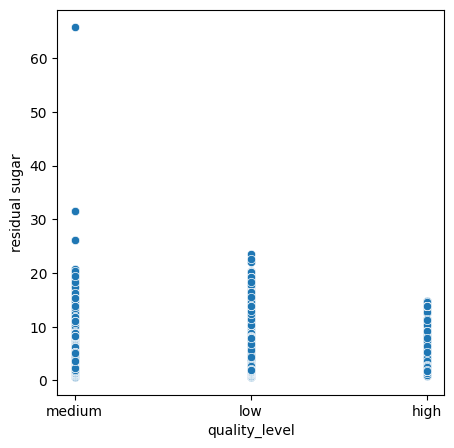

In [19]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality_level', y='residual sugar', data=wine_df)

Observation -
- quality level and residual sugar are inversely proportional to each other
- when residual sugar increases , quality level decreases and vice versa

### Visualize quality level vs chlorides using scatter plot

<AxesSubplot: xlabel='quality_level', ylabel='chlorides'>

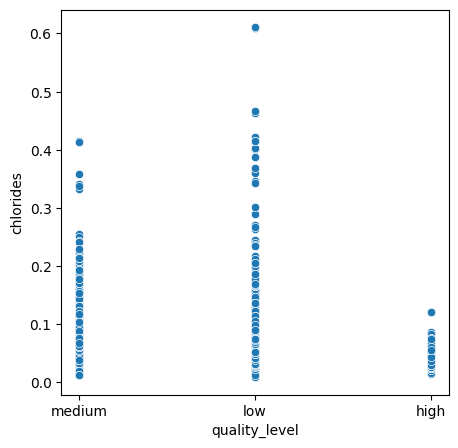

In [20]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality_level', y='chlorides', data=wine_df)

Observation -
- quality level and chlorides are inversely proportional to each other
- when rchlorides increases , quality level decreases and vice versa

### Visualize quality level vs free sulphur dioxide using bar plot

<AxesSubplot: xlabel='quality_level', ylabel='free sulfur dioxide'>

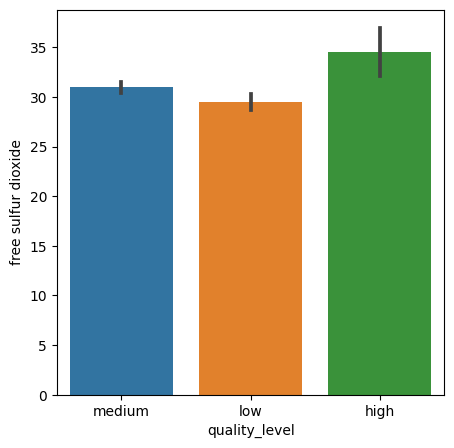

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality_level', y='free sulfur dioxide', data=wine_df)

Observation -
- quality level and free sulphur dioxide are directly proportional to each other
- when quality free dioxide increases , quality level increases and vice versa

### Visualize quality level vs total sulfur dioxide using bar plot 

<AxesSubplot: xlabel='quality_level', ylabel='total sulfur dioxide'>

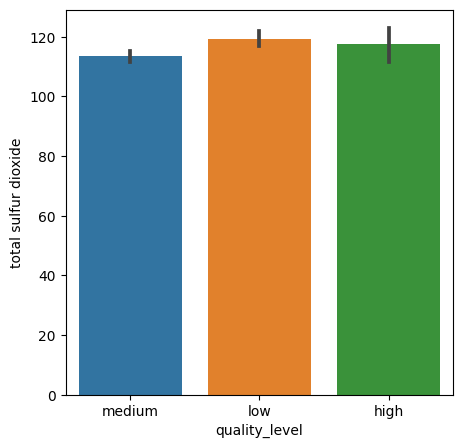

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality_level', y='total sulfur dioxide', data=wine_df)

Observation -
- All 3 quality levels have almost same amount of total sulphur dioxide

### Visualize quality level vs density using box plot

<AxesSubplot: xlabel='quality_level', ylabel='density'>

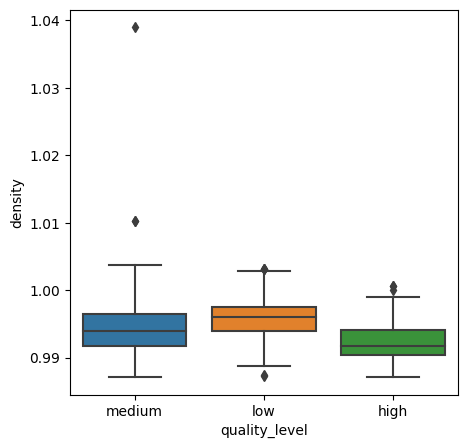

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(x='quality_level', y='density', data=wine_df)

Observation -
- quality level and density are inversely proportional to each other
- when density increases , quality level decreases and vice versa

### Visualize quality level vs pH using bar plot

<AxesSubplot: xlabel='quality_level', ylabel='pH'>

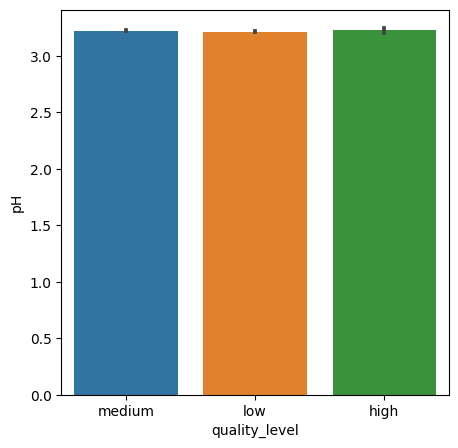

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality_level', y='pH', data=wine_df)

Observation -
- pH is almost same for all quality levels

### Visualize quality level vs sulphates using scatter plot

<AxesSubplot: xlabel='quality_level', ylabel='sulphates'>

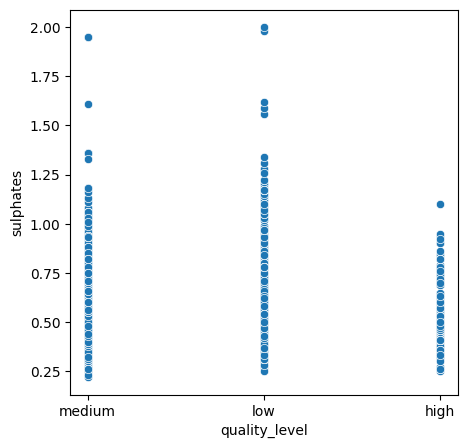

In [25]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality_level', y='sulphates', data=wine_df)

Observation -
- quality level and sulphates are inversely proportional to each other
- when sulphates increases , quality level decreases and vice versa

### Visualize quality level vs alcohol using bar plot

<AxesSubplot: xlabel='quality_level', ylabel='alcohol'>

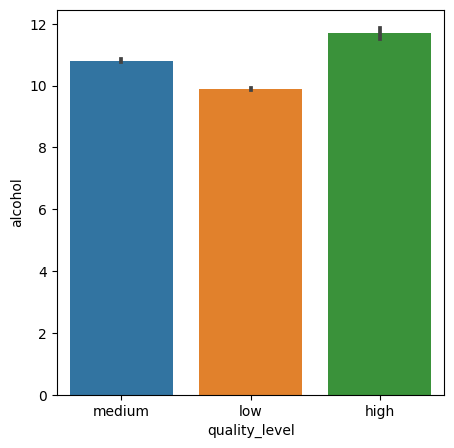

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality_level', y='alcohol', data=wine_df)

Observation -
- Quality levels and alcohol content are directly proportional
- As alcohol content increases, the quality level also increases and vice versa

### Conclusion on relationships between quality level and all other features
Except pH and total sulphur dioxide, all other features play a role in determing the quality of wine
- Features that are directly proportional to quality level - citric acid, free sulphur dioxide, alcohol
- Features that are inversely proportional to quality level - fixed acidity, volatile acidity, residual sugar, chlorides, density, sulphates

### Change quality level to numerical data - for easier calculation

- low : 0
- medium : 1
- high : 2

In [27]:
ql_numeric = {'low':0, 'medium': 1, 'high': 2}
ql_new = wine_df.quality_level.map(ql_numeric)
wine_df['quality_level'] = ql_new

Dataset after updating quality level column 

In [28]:
wine_df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


## Correlation
### Find any correlation between all features

- Positive correlation - when both the values are directly proportional (both increases or both decreases)
- Negative correlation - when both the values are inversely proportional (one increases and other decreases)

In [29]:
correlation = wine_df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\2879285393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = wine_df.corr()


In [30]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077377
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.258818
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.074901
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.030336
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.189408
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.053339
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041265
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.285212
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019616
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.024703


### Visualize correlation between all features of Wine using heatmap

<AxesSubplot: >

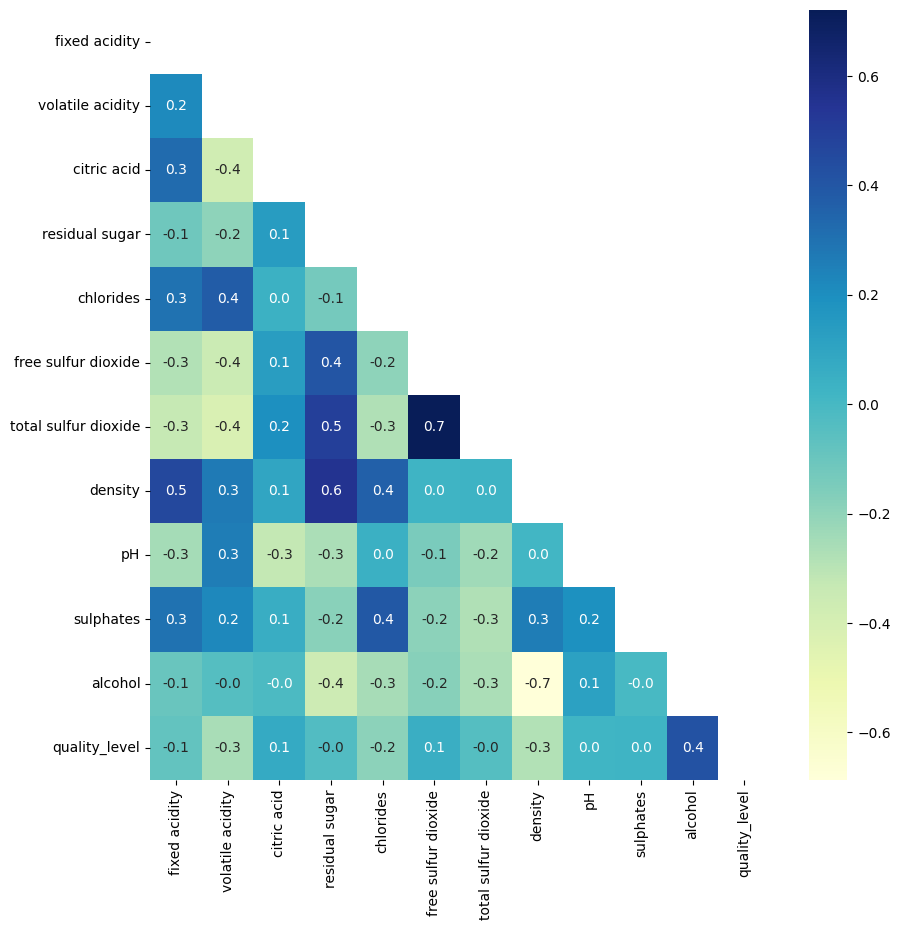

In [31]:
wine_color_corr = correlation.quality_level.keys()
wine_color_corres = correlation.loc[wine_color_corr, wine_color_corr]
mask = np.triu(np.ones_like(correlation))
plt.figure(figsize=(10, 10))
sns.heatmap(wine_color_corres, cmap="YlGnBu", fmt='.1f',annot=True, mask=mask)

### Observation -
- Total and free sulfur dioxide are highly correlated with each other.
- White wine is also highly correlated with free and total sulfur dioxide.
- Residual sugar has a half correlation with total sulfur dioxide and about 0.40 with free sulfur dioxide. The 0.5 indicates that white wine tend to have more residual sugar than red wine.
- Density has a high positive correlation with residual sugar and a high negative correlation with alcohol.

### Check for any Outliers using box plot

- Outliers are values that are outside the inter quantile range. It lies an abnormal distance from other values in a random sample from a population. 
- Outliers may affect the overall prediction hence it needs to be removed or replaced

<AxesSubplot: >

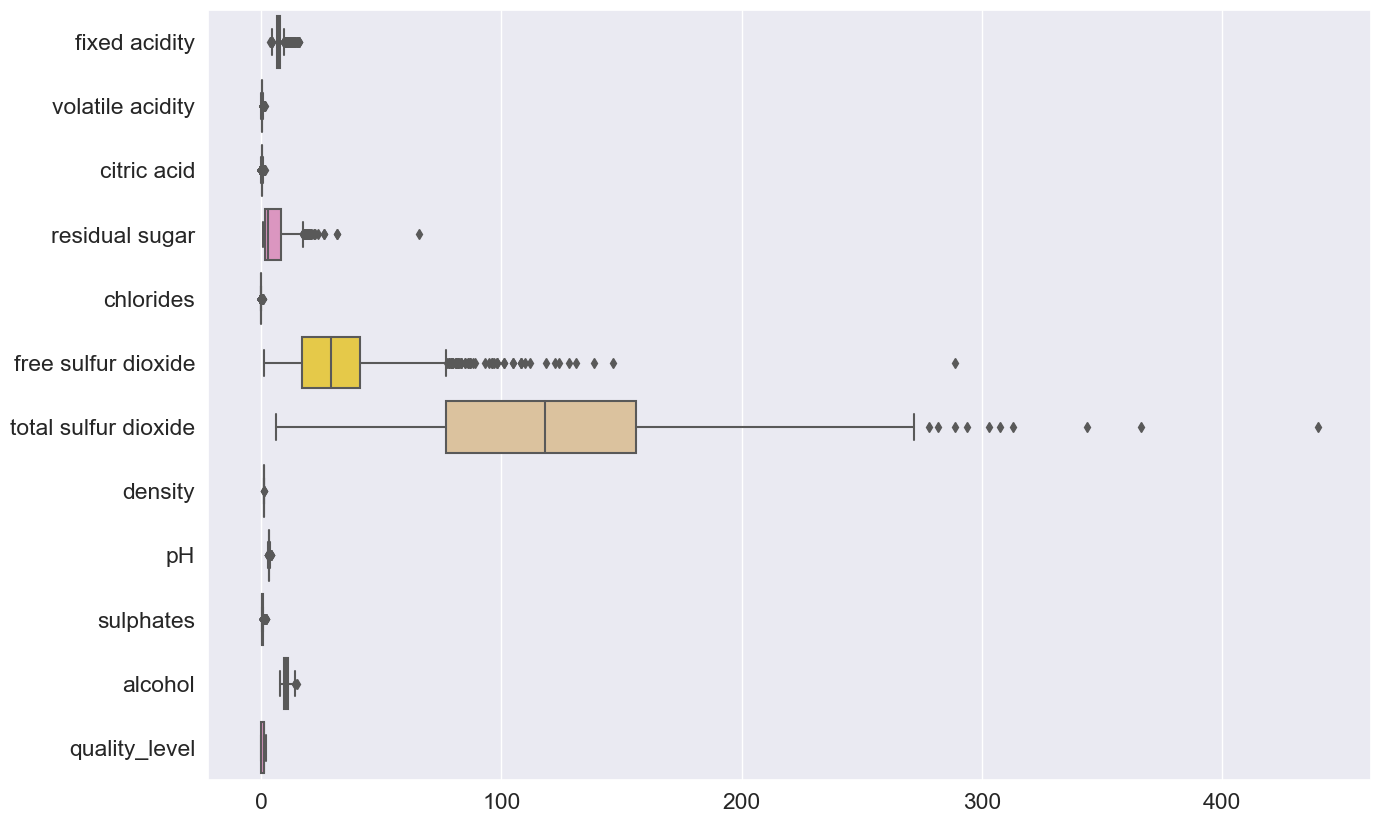

In [32]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.boxplot(data = wine_df , palette='Set2', orient = 'h')

#### Observation 
- As seen above, significant outliers exists in residual sugar, free sulfur dioxide and total sulfur dioxide

# Data Preprocessing
- Data preprocessing is a step in the data mining and data analysis process that takes raw data and transforms it into a format that can be understood and analyzed by computers and machine learning.
- Raw, real-world data in the form of text, images, video, etc., is messy. Not only may it contain errors and inconsistencies, but it is often incomplete, and doesn’t have a regular, uniform design.
- Machines like to process nice and tidy information – they read data as 1s and 0s. So calculating structured data, like whole numbers and percentages is easy.

### Handling Null values in dataset

Null values might affect the overall prediction, hence it's better to handle them before proceeding

In [33]:
null_values = wine_df.isnull().sum()
print(null_values)
print("\nTotal number of null values are",null_values.sum())
print("Percentage of null values : ",("{:.2f}".format((null_values.sum()/wine_df.shape[0])*100)),"%")

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality_level            0
dtype: int64

Total number of null values are 38
Percentage of null values :  0.58 %


##### Observation - dataset contains very little Null values

It is better to remove the null values as the performance won't be affected

In [34]:
wine_df = wine_df.dropna()

Now, check for Null values (NaN) in dataset

In [35]:
null_values = wine_df.isnull().sum()
print(null_values)
print("\nTotal number of null values are",null_values.sum())
print("Percentage of null values : ",("{:.2f}".format((null_values.sum()/wine_df.shape[0])*100)))

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_level           0
dtype: int64

Total number of null values are 0
Percentage of null values :  0.00


### Remove Outliers from Dataset

Shape (number of rows and columns) of Dataset before removing Outliers

In [36]:
old_shape = wine_df.shape
print("Old shape of dataset : ",old_shape)

Old shape of dataset :  (6463, 13)


Defining a function that contains a list to remove Outliers
- Using inter quantile range method to remove outliers from upper and lower quantile
- Removing values above and below the inter quantile range

In [37]:
def remove_outliers(wine_df,column):
    q1 = wine_df[column].quantile(0.25)
    q3 = wine_df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 *iqr
    outliers_list = wine_df.index[(wine_df[column] < lower) | (wine_df[column] > upper)]

    return outliers_list

iterating over the columns and storing the outlier values in an empty list

In [38]:
list_res =[]
for i in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality_level']:
    list_res.extend(remove_outliers(wine_df,i))

Total number of outliers present -

In [39]:
len(list_res)

1980

creating a function to return final cleaned dataset after removing outliers

In [40]:
def cleaned_dataframe(wine_df,lis):
    lis = sorted(set(lis))
    wine_df = wine_df.drop(lis)
    return wine_df

Call the above function

In [41]:
clean_wine_df = cleaned_dataframe(wine_df,list_res)

In [42]:
print("new shape after remvoing outliers: ",clean_wine_df.shape)

new shape after remvoing outliers:  (4999, 13)


Plot a boxplot to verify if Outliers are removed

<AxesSubplot: >

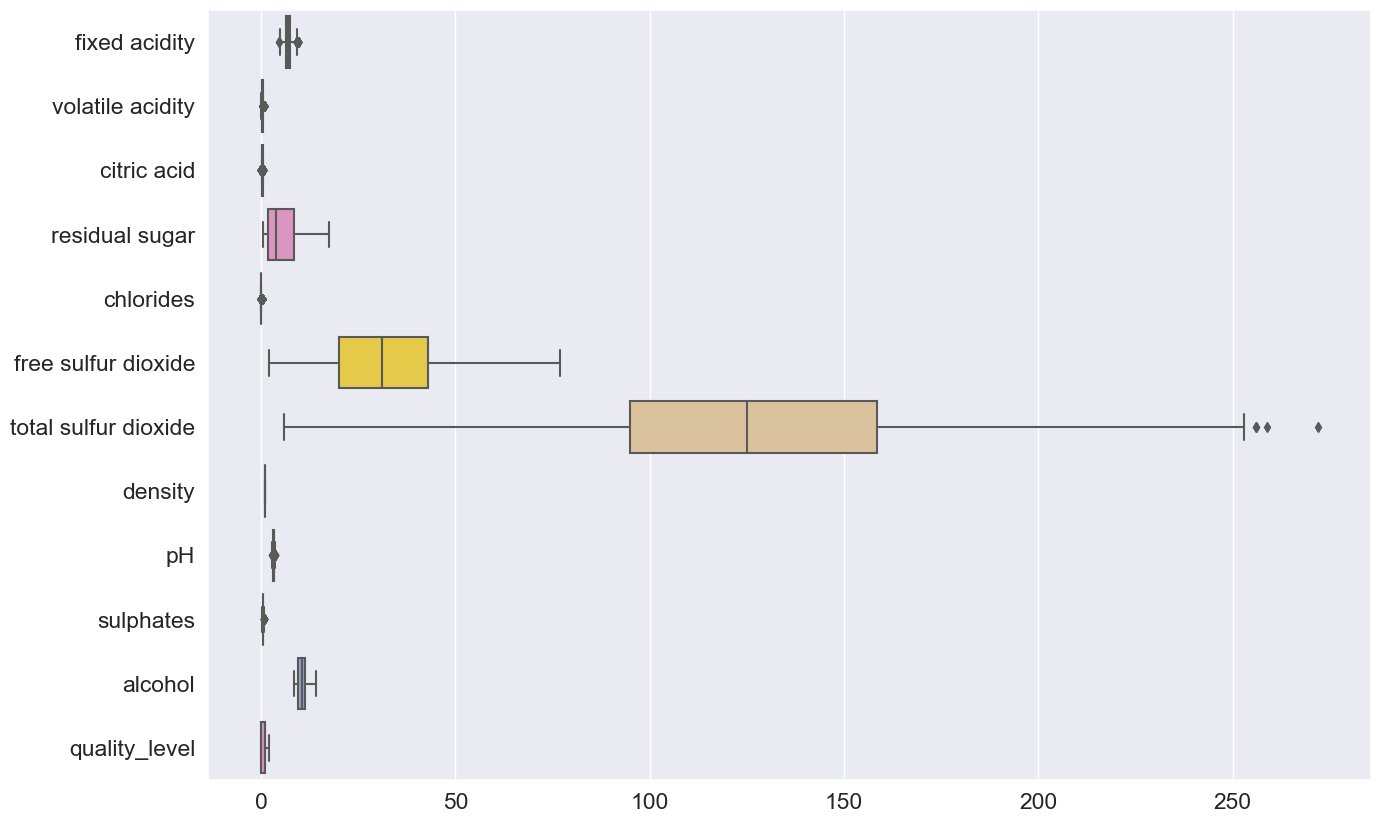

In [43]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.boxplot(data = clean_wine_df , palette='Set2', orient = 'h')

### Observation
- All major outliers are removed as compared to previous boxplot

## Create a new column - 'wine_color'

### Perform label encoding - 
since there are only 2 categories of wine 

- Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [44]:
clean_wine_df['wine_color'] = LabelEncoder().fit_transform(clean_wine_df.type.values)

- If wine color is red - let it be 0
- If wine color is white - let it be 1

Now, drop the original column - 'type' to avoid redundancy

In [45]:
clean_wine_df = clean_wine_df.drop(['type'], axis = 1)

Updated dataset after dropping 'type' column

In [46]:
clean_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level,wine_color
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0


### Store output features (quality_level and wine_color) seperately
- So it can be used later on in model prediction
- hence it prevents output variables to have any influence in model prediction  

Store quality level values in quality variable

In [47]:
quality = clean_wine_df['quality_level']
quality

1       1
2       1
3       1
4       1
5       1
       ..
6491    1
6492    0
6494    1
6495    0
6496    1
Name: quality_level, Length: 4999, dtype: int64

Store wine color values in color variable

In [48]:
color = clean_wine_df['wine_color']
color

1       1
2       1
3       1
4       1
5       1
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: wine_color, Length: 4999, dtype: int32

### Check if dataset is normally distributed using QQ plot
- Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
- One of the important characteristic of a normal distribution is that it has no skew which should be understood when we say the distribution is symmetric.
- Skewed values - are those which do not follow a normal dsitribution

### QQ test - 
- QQ Plot stands for Quantile vs Quantile Plot. It plots theoretical quantiles against the actual quantiles of the variable.
- A straight line on the QQ Plot indicates that dataset follows a normal distribution.

copy the dataframe and store in a new variable, to perform QQ test

In [49]:
qq_data = clean_wine_df.copy()

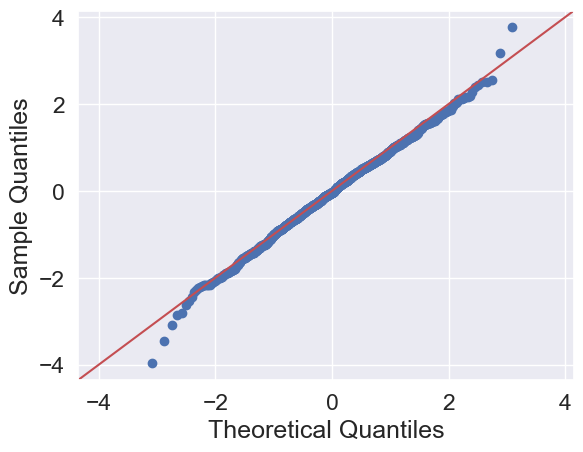

In [50]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
qq_data = norm.rvs(size=1000)
sm.qqplot(qq_data, line='45')
pylab.show()

### Observation
- Majority of the points in dataset follow a straight line, hence indicating it is normally distributed
- Feature scaling is not required as data is normally distributed

## Identify and remove Multi collinearity

- Remove features that are highly correlated with each other
- Highly correlated features makes it hard to interpret model and also creates an overfitting problem
- It will increase complexity of algorithm, thus increasing risk of errors

Find the correlation of the new scaled dataset

In [51]:
cor_matrix = clean_wine_df.corr().abs()
cor_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level,wine_color
fixed acidity,1.000000,0.154813,0.234943,0.033197,0.319812,0.174261,0.153491,0.347705,0.248554,0.135537,0.114729,0.100176,0.343221
volatile acidity,0.154813,1.000000,0.318702,0.116789,0.429596,0.283151,0.266677,0.184793,0.180028,0.172596,0.009937,0.226496,0.568642
citric acid,0.234943,0.318702,1.000000,0.095433,0.118001,0.137972,0.169240,0.031028,0.173242,0.022730,0.041866,0.069680,0.177610
residual sugar,0.033197,0.116789,0.095433,1.000000,0.048781,0.417290,0.475198,0.651732,0.244841,0.125666,0.395608,0.022287,0.277213
chlorides,0.319812,0.429596,0.118001,0.048781,1.000000,0.188599,0.235221,0.524392,0.205560,0.308732,0.395942,0.256130,0.699323
free sulfur dioxide,0.174261,0.283151,0.137972,0.417290,0.188599,1.000000,0.680002,0.168544,0.123550,0.099960,0.201323,0.060283,0.379316
total sulfur dioxide,0.153491,0.266677,0.169240,0.475198,0.235221,0.680002,1.000000,0.230076,0.190979,0.160172,0.327019,0.075802,0.588836
density,0.347705,0.184793,0.031028,0.651732,0.524392,0.168544,0.230076,1.000000,0.055006,0.200892,0.776826,0.285333,0.299880
pH,0.248554,0.180028,0.173242,0.244841,0.205560,0.123550,0.190979,0.055006,1.000000,0.277916,0.056335,0.026137,0.335111
sulphates,0.135537,0.172596,0.022730,0.125666,0.308732,0.099960,0.160172,0.200892,0.277916,1.000000,0.033481,0.023869,0.406936


Visualize correlation matrix

<AxesSubplot: >

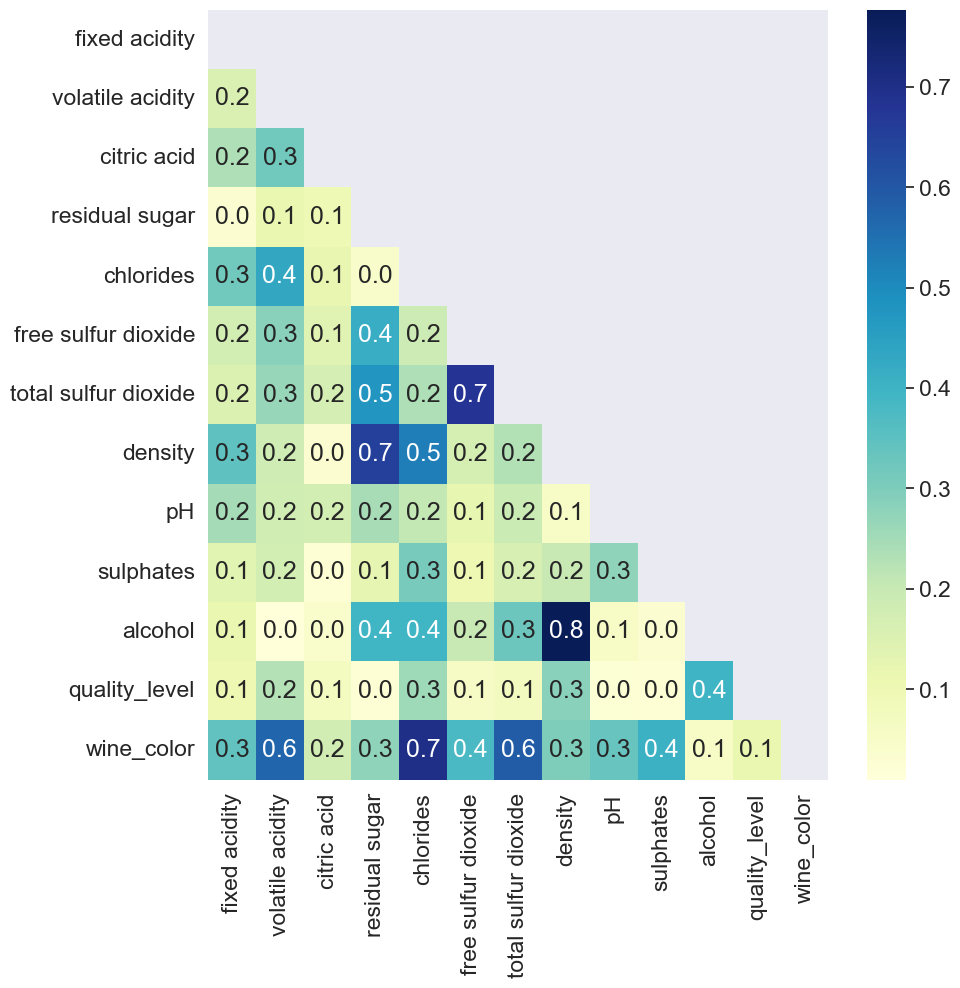

In [52]:
mask = np.triu(np.ones_like(cor_matrix))
plt.figure(figsize=(10, 10))
sns.heatmap(cor_matrix, cmap="YlGnBu", fmt='.1f',annot=True, mask = mask)

Retrieve lower or upper triangular elements and store it in a variable (Since they're mirror images of each other, any one is required)

In [53]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\918335127.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level,wine_color
fixed acidity,NaN,0.154813,0.234943,0.033197,0.319812,0.174261,0.153491,0.347705,0.248554,0.135537,0.114729,0.100176,0.343221
volatile acidity,NaN,NaN,0.318702,0.116789,0.429596,0.283151,0.266677,0.184793,0.180028,0.172596,0.009937,0.226496,0.568642
citric acid,NaN,NaN,NaN,0.095433,0.118001,0.137972,0.169240,0.031028,0.173242,0.022730,0.041866,0.069680,0.177610
residual sugar,NaN,NaN,NaN,NaN,0.048781,0.417290,0.475198,0.651732,0.244841,0.125666,0.395608,0.022287,0.277213
chlorides,NaN,NaN,NaN,NaN,NaN,0.188599,0.235221,0.524392,0.205560,0.308732,0.395942,0.256130,0.699323
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.680002,0.168544,0.123550,0.099960,0.201323,0.060283,0.379316
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230076,0.190979,0.160172,0.327019,0.075802,0.588836
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055006,0.200892,0.776826,0.285333,0.299880
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277916,0.056335,0.026137,0.335111
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033481,0.023869,0.406936


Now store the values that are greater than 0.6 (highly correlated) in a new variable

In [54]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.60)]
print(to_drop[:-1])

['total sulfur dioxide', 'density', 'alcohol']


### Observation
- Top 2 features that are highly correlated and might effect overal prediction are - total sulfur dioxide and density
- Hence drop above 2 features from dataset
- Note - Even though alcohol has high correlation, it cannot be removed as it is crucial in prediction


Drop total sulfur dioxide and density from dataset

In [55]:
clean_wine_df = clean_wine_df.drop(['total sulfur dioxide','density'],axis = 1)

In [56]:
clean_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality_level,wine_color
1,6.3,0.300,0.34,1.6,0.049,14.0,3.30,0.49,9.5,1,1
2,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1,1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9,1,1
4,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9,1,1
5,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,3.42,0.82,9.5,1,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2,0,0


# model training and testing

Store output features - quality_level and wine_color in seperate variables and drop them from original dataset

In [57]:
quality = clean_wine_df['quality_level']
color = clean_wine_df['wine_color']

In [58]:
clean_wine_df = clean_wine_df.drop(['quality_level','wine_color'], axis = 1)

New dataset after dropping output features

In [59]:
clean_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
1,6.3,0.300,0.34,1.6,0.049,14.0,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9
5,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1
...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2


# Wine color prediction

## Method :  Binary Classification
- It is a process or task of classification, in which a given data is being classified into two classes.  It’s basically a kind of prediction about which of two groups the thing belongs to. 
- Working : In binary classification, the model will classify the output into 2 classes : in our dataset, as red wine and white wine

### First, split the dataset into 75% training and 25% testing data
- Data splitting is an important aspect of data science, particularly for creating models based on data.
- In a basic two-part data split, the training data set is used to train and develop models. Training sets are commonly used to estimate different parameters or to compare different model performance.
- The testing data set is used after the training is done. The training and test data are compared to check that the final model works correctly.

In [60]:
x_train , x_test ,  y_train , y_test = train_test_split(clean_wine_df,color, test_size=0.25, random_state=101)

In [61]:
print("Shape of training data",x_train.shape)
print("Shape of testing data",x_test.shape)

Shape of training data (3749, 9)
Shape of testing data (1250, 9)


In [62]:
print("Shape of output - training data",y_train.shape)
print("Shape of output - testing data",y_test.shape)

Shape of output - training data (3749,)
Shape of output - testing data (1250,)


# Model 1 : logistic Regression
- Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. 
- This model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

### Working
- This model computes a sum of the input features (in most cases, there is a bias term), and calculates the logistic of the result.
- The output of logistic regression is always between (0, and 1), which is suitable for a binary classification task. The higher the value, the higher the probability that the current sample is classified as class=1, and vice versa.
- It divides the population into two groups with a cut-off of 0.5. Everything above 0.5 is considered to belong to group A, and everything below is considered to belong to group B.

Calling Logistic Regression model and assigning it to a vairable

In [63]:
lr = LogisticRegression()

Train the model using previously split data

In [64]:
lr.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Since model is trained, should Test / predict model performance 

In [65]:
y_pred = lr.predict(x_test)

## Confusion Matrix
- is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.
- It is extremely useful for measuring Recall, Precision, Specificity and Accuracy

<AxesSubplot: >

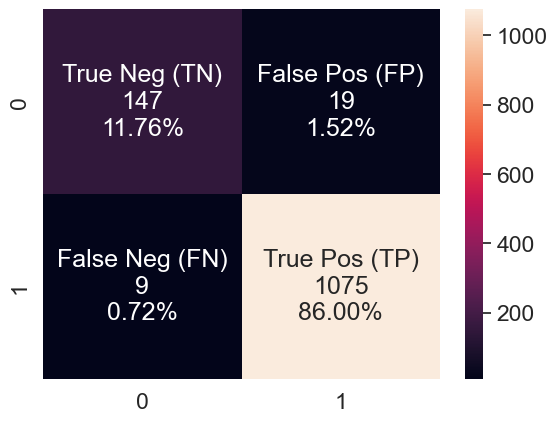

In [66]:
cf_matrix = confusion_matrix(y_test.values, y_pred)
group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cf_matrix.flatten() / np.sum(cf_matrix)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(confusion_matrix(y_test.values, y_pred), annot=labels, fmt='')

### Observation 

#### TP and TN sums up to ~97% 
- True Positive:

Interpretation: predicted positive and it’s true.

- True Negative:

Interpretation: You predicted negative and it’s true.

- False Positive: (Type 1 Error)

Interpretation: You predicted positive and it’s false.

- False Negative: (Type 2 Error)

Interpretation: You predicted negative and it’s false.

# Performance Metrics
- It is important to evaluate the performance of the classifications model in order to reliably use these models in production for solving real-world problems. 
- Performance measures in machine learning classification models are used to assess how well machine learning classification models perform in a given context. 
- These performance metrics include accuracy, precision, recall, and F1-score.

## F1 Score
- represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations).
- F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

In [67]:
f1 = metrics.f1_score(y_test,y_pred,average='micro')

## Precision Score
- measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value. Precision is used in conjunction with the recall to trade-off false positives and false negatives.
- Precision Score = TP / (FP + TP)

In [68]:
precision = metrics.precision_score(y_test, y_pred)

## Recall Score
- represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made.
- Recall Score = TP / (FN + TP)

In [69]:
recall = metrics.recall_score(y_test,y_pred)

## Accuracy Score
- Model accuracy is a machine learning classification model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions.
- Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

In [70]:
accuracy = metrics.accuracy_score(y_test,y_pred)

### Display all the scores together and compare them

In [71]:
log = pd.DataFrame(columns=["model", "accuracy"])
log = log.append({"model": "logistic regression", "accuracy": accuracy,"recall":recall,"precision":precision,"f1":f1}, ignore_index=True)
log

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\3756369486.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({"model": "logistic regression", "accuracy": accuracy,"recall":recall,"precision":precision,"f1":f1}, ignore_index=True)


,model,accuracy,recall,precision,f1
0,logistic regression,0.9776,0.991697,0.982633,0.9776


## Classification report based on 2 output classes

In [72]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['red', 'white']))


Classification Report

              precision    recall  f1-score   support

         red       0.94      0.89      0.91       166
       white       0.98      0.99      0.99      1084

    accuracy                           0.98      1250
   macro avg       0.96      0.94      0.95      1250
weighted avg       0.98      0.98      0.98      1250



#### Observation 
- Model has an high performance metrics and hence reliable
- Both red and white wine is accurately predicted
- White wine has overall more accuracy compared to red white

### Test model performance using new data

Take random rows and verify if it predicts wine color correctly

In [73]:
x_test.iloc[[0]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
2018,7.0,0.2,0.34,2.1,0.049,12.0,3.25,0.46,11.6


In [74]:
y_pred[0]

1

- output is 1.0 , hence wine color is white
- verify the output using original data

In [75]:
wine_df.iloc[[2018]]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level
2042,white,5.6,0.13,0.27,4.8,0.028,22.0,104.0,0.9948,3.34,0.45,9.2,1


Similary , test for red wine

In [76]:
x_test.iloc[[14]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
5530,7.6,0.41,0.14,3.0,0.087,21.0,3.32,0.57,10.5


In [77]:
y_pred[14]

0

- output is 0 , hence wine color is red
- verify the output using original data

In [78]:
wine_df.iloc[[5530]]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level
5558,red,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.9973,3.32,0.81,9.6,1


#### Observation
- Logstic regression model accurately predicts the color of wine

## Model 2 : Naive Bayes
- It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
- Gaussian: It is used in classification and it assumes that features follow a normal distribution.

### Working 
- Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred.
- Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
- P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). 
- The evidence is an attribute value of an unknown instance(here, it is event B).
- P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

In [79]:
# training the model on training set
nb = GaussianNB()
nb.fit(x_train, y_train)
  
# making predictions on the testing set
y_pred_nb = nb.predict(x_test)

### Confusion Matrix

<AxesSubplot: >

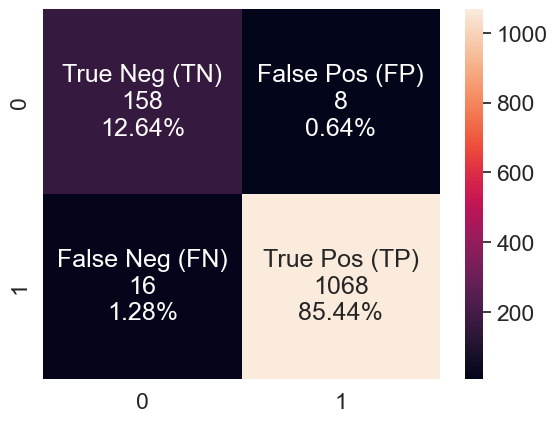

In [80]:
cf_matrix2 = confusion_matrix(y_test.values, y_pred_nb)
group_names2 = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages2 = [
    "{0:.2%}".format(value)
    for value in cf_matrix2.flatten() / np.sum(cf_matrix2)
]
labels2 = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names2, group_counts2, group_percentages2)
]
labels2 = np.asarray(labels2).reshape(2, 2)
sns.heatmap(confusion_matrix(y_test.values, y_pred_nb), annot=labels2, fmt='')

### Observation
- TP and TN sums up to ~98 %
- Hence, indicating most of the data is correctly predicted

### Performance metrics

In [81]:
ac = metrics.accuracy_score(y_test, y_pred_nb)
f_1 = metrics.f1_score(y_test, y_pred_nb)
prec = metrics.precision_score(y_test, y_pred_nb)
rec = metrics.recall_score(y_test, y_pred_nb)

### Display all scores together and compare them

In [82]:
log = log.append({'model':'Naive Bayes','accuracy':ac,'recall':rec,'precision':prec,'f1':f_1},ignore_index=True)
log

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\3850064161.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({'model':'Naive Bayes','accuracy':ac,'recall':rec,'precision':prec,'f1':f_1},ignore_index=True)


,model,accuracy,recall,precision,f1
0,logistic regression,0.9776,0.991697,0.982633,0.977600
1,Naive Bayes,0.9808,0.985240,0.992565,0.988889


## Classification report for both the output classes
- Measures the performance for each of the output classes
- Useful in determining whether all the output classes performs well

In [83]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_nb, target_names=['red', 'white']))


Classification Report

              precision    recall  f1-score   support

         red       0.91      0.95      0.93       166
       white       0.99      0.99      0.99      1084

    accuracy                           0.98      1250
   macro avg       0.95      0.97      0.96      1250
weighted avg       0.98      0.98      0.98      1250



### Observation
- White wine is predicted with a much high accuracy than red wine
- Overall, Naive Bayes performs really well

# Wine Quality Prediction

## Method : Multi Class Classification
- Multi-class classification is the task of classifying elements into different classes. Unlike binary, it doesn’t restrict itself to any number of classes. 

- Split dataset into training and testing
- Now use 'quality' column as output

In [164]:
x_train , x_test ,  y_train , y_test = train_test_split(clean_wine_df, quality, test_size=0.25, random_state=1)

## Model 1 : Decision Tree Classifier
- Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
- The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.
- The ideal tree is the smallest tree possible, i.e. with fewer splits, that can accurately classify all data points.
- On every split, the algorithm tries to divide the dataset into the smallest subset possible. So, like any other Machine Learning algorithm, the goal is to minimize the loss function as much as possible.

In [165]:
#calling decision tree classifier model
dt= DecisionTreeClassifier()
#training the model on train datasets
dt.fit(x_train,y_train)
#predicting the model using test dataset
y_preddt=dt.predict(x_test)

## Confusion matrix

In [166]:
confusion = confusion_matrix(y_test, y_preddt)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[265 133   6]
 [140 629  24]
 [  5  34  14]]


Lets visualize the confusion matrix

<AxesSubplot: >

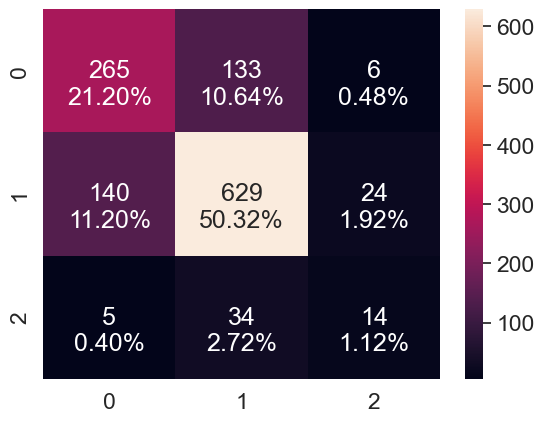

In [167]:
cf_matrix3 = confusion_matrix(y_test.values, y_preddt)
group_names3 = ['','','','','','','','','']
group_counts3 = ["{0:0.0f}".format(value) for value in cf_matrix3.flatten()]
group_percentages3 = [
    "{0:.2%}".format(value)
    for value in cf_matrix3.flatten() / np.sum(cf_matrix3)
]
labels3 = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names3, group_counts3, group_percentages3)
]
labels3 = np.asarray(labels3).reshape(3, 3)
sns.heatmap(confusion_matrix(y_test.values, y_preddt), annot=labels3, fmt='')

### Observation
- Unlike binary classification, there are no positive or negative classes here. At first, it might be a little difficult to find TP, TN, FP and FN since there are no positive or negative classes, but it’s actually pretty easy. 
- What we have to do here is to find TP, TN, FP and FN for each individual class.
- for example - take 0 - low quality -
1. TP = 434
2. TN = 436 + 47 + 23 + 564
3. FP = 122 + 13
4. FN = 138 + 6

### Performance metrics

In [168]:
ac = metrics.accuracy_score(y_preddt,y_test)
f_1 = metrics.f1_score(y_test, y_preddt,average='micro')
prec = metrics.precision_score(y_test, y_preddt,average='micro')
rec = metrics.recall_score(y_test, y_preddt,average='micro')

#### Display all the performance metrics together

In [169]:
log = pd.DataFrame(columns=["model", "accuracy","recall","precision","f1"])
log = log.append({"model": "Decision Tree", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)
log

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\1935214173.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({"model": "Decision Tree", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)


,model,accuracy,recall,precision,f1
0,Decision Tree,0.7264,0.7264,0.7264,0.7264


### Classification report for all the 3 output classes

In [170]:
print('\nClassification Report\n')
print(classification_report(y_test, y_preddt, target_names=['low', 'medium', 'high']))


Classification Report

              precision    recall  f1-score   support

         low       0.65      0.66      0.65       404
      medium       0.79      0.79      0.79       793
        high       0.32      0.26      0.29        53

    accuracy                           0.73      1250
   macro avg       0.58      0.57      0.58      1250
weighted avg       0.72      0.73      0.72      1250



### Observation
- Decision Tree model performs on an average level
- Accuracy is not that good
- Only medium class accuracy is comparitively better
- With high class having the least accuracy

## Lets, try to improve the model performance

## Handling imbalanced data
- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

### Lets check how the values in output class is distributed

In [171]:
quality.value_counts()

1    3170
0    1656
2     173
Name: quality_level, dtype: int64

#### Observation
- Data is imbalanced as the values are not evenly distributed

## Perform SMOTE
- Synthetic Minority Oversampling Technique or SMOTE. 
- In SMOTE new instances are synthesized from the existing data. 
- in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [172]:
oversample = SMOTE(k_neighbors = 4)
x, y = oversample.fit_resample(x_train,y_train)

Now, re spllit the dataset using above x and y values

In [173]:
x_train , x_test ,  y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=45)

## Retrain Decision Tree Classifier with balanced data

In [174]:
#calling decision tree classifier model
dt= DecisionTreeClassifier()
#training the model on train datasets
dt.fit(x_train,y_train)
#predicting the model using test dataset
y_preddt=dt.predict(x_test)

### Performance metrics

In [175]:
ac = metrics.accuracy_score(y_preddt,y_test)
f_1 = metrics.f1_score(y_test, y_preddt,average='micro')
prec = metrics.precision_score(y_test, y_preddt,average='micro')
rec = metrics.recall_score(y_test, y_preddt,average='micro')

#### Display all the performance metrics together

In [178]:
log = log.append({"model": "Decision Tree with Balanced data", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)
log

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\1455005417.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({"model": "Decision Tree with Balanced data", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)


,model,accuracy,recall,precision,f1
0,Decision Tree,0.726400,0.726400,0.726400,0.726400
1,Decision Tree with Balanced data,0.818284,0.818284,0.818284,0.818284


### Classification report for all the 3 output classes

In [104]:
print('\nClassification Report\n')
print(classification_report(y_test, y_preddt, target_names=['low', 'medium', 'high']))


Classification Report

              precision    recall  f1-score   support

         low       0.75      0.76      0.76       569
      medium       0.75      0.70      0.73       621
        high       0.90      0.95      0.93       593

    accuracy                           0.80      1783
   macro avg       0.80      0.81      0.80      1783
weighted avg       0.80      0.80      0.80      1783



### Observation
- The accuracy has relatively increased by 8% after data balancing
- High class predicts with a very high accuracy
- With medium class having the least accuracy

## Model 2 : Random Forest Classifier
- Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 
- Steps :
1. In Random forest n number of random records are taken from the data set having k number of records.

2. Individual decision trees are constructed for each sample.

3. Each decision tree will generate an output.

4. Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

## Perform feature selection to improve accuracy of the model

## Method : Feature Importance

In [179]:
feature_names = [f"feature {i}" for i in range(clean_wine_df.shape[1])]
f= RandomForestClassifier(random_state=101)
f.fit(x_train, y_train)

RandomForestClassifier(random_state=101)

### Feature importance based on mean decrease in impurity
- Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits.
- Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [180]:
start_time = time.time()
importances = f.feature_importances_
std = np.std([tree.feature_importances_ for tree in f.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.029 seconds


### Plot the impurity-based importance.

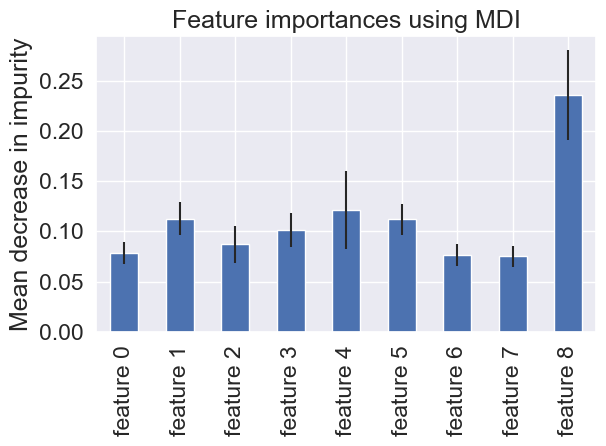

In [181]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Another approach in finding out the feature importance
# **Permution Importance**
- Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [182]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    f, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 8.912 seconds


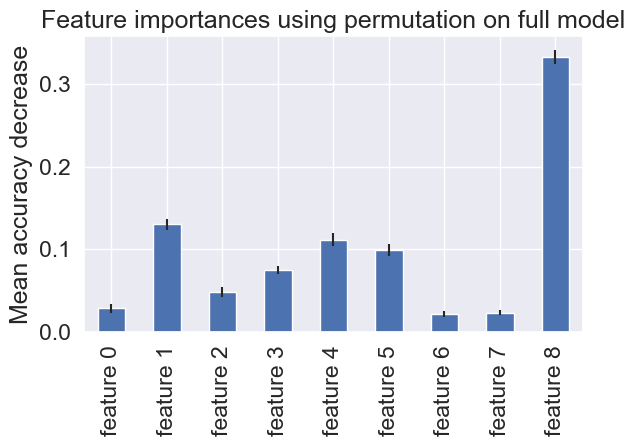

In [183]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

features 0 to 8 represent the columns in ascending order

In [184]:
clean_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
1,6.3,0.300,0.34,1.6,0.049,14.0,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9
5,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1
...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2


### Observation
- The same features are detected as most important using both methods. Although the relative importances vary. As seen on the plots, MDI is less likely than permutation importance to fully omit a feature.
- Remove Sulphates and fixed acidity features as their importance is very low
- Alcohol is the most important feature with volatile acidity bagging the second place

In [185]:
reduced_wine_df = clean_wine_df.copy()

In [186]:
reduced_wine_df = reduced_wine_df.drop(['sulphates','fixed acidity'],axis = 1)

In [187]:
x = x.drop(['sulphates','fixed acidity'],axis = 1)

### Reduced dataset with only important features


In [188]:
reduced_wine_df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,alcohol
1,0.300,0.34,1.6,0.049,14.0,3.30,9.5
2,0.280,0.40,6.9,0.050,30.0,3.26,10.1
3,0.230,0.32,8.5,0.058,47.0,3.19,9.9
4,0.230,0.32,8.5,0.058,47.0,3.19,9.9
5,0.280,0.40,6.9,0.050,30.0,3.26,10.1
...,...,...,...,...,...,...,...
6491,0.620,0.08,1.9,0.068,28.0,3.42,9.5
6492,0.600,0.08,2.0,0.090,32.0,3.45,10.5
6494,0.510,0.13,2.3,0.076,29.0,3.42,11.0
6495,0.645,0.12,2.0,0.075,32.0,3.57,10.2


In [189]:
x

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,alcohol
0,0.280000,0.440000,7.100000,0.048000,49.000000,3.150000,9.200000
1,0.200000,0.370000,2.000000,0.030000,26.000000,3.280000,10.200000
2,0.320000,0.380000,4.750000,0.033000,23.000000,3.420000,11.800000
3,0.630000,0.040000,1.300000,0.058000,25.000000,3.170000,10.200000
4,0.180000,0.370000,6.200000,0.050000,21.000000,3.200000,10.500000
...,...,...,...,...,...,...,...
7126,0.228752,0.280000,2.723905,0.051909,48.488570,3.043867,9.516001
7127,0.240206,0.298728,9.166323,0.028010,37.336768,3.071787,12.466323
7128,0.388306,0.292588,2.471882,0.038415,27.674117,3.347412,12.162941
7129,0.303616,0.305599,14.384039,0.027640,18.880295,3.192793,11.740025


Re-split the model with the reduced dataset

In [190]:
x_train , x_test ,  y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [191]:
f= RandomForestClassifier(random_state=101)
f.fit(x_train, y_train)
ypredf=f.predict(x_test)

### Confusion matrix

<AxesSubplot: >

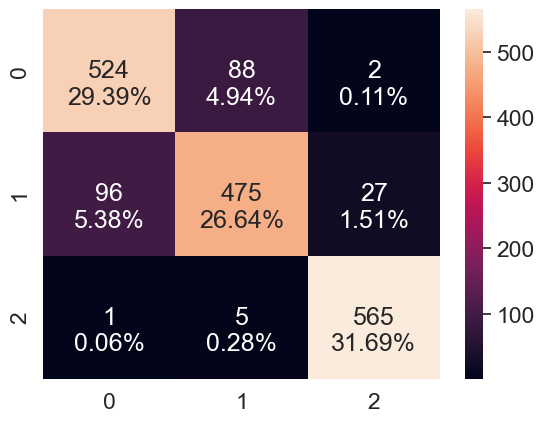

In [192]:
cf_matrix3 = confusion_matrix(y_test.values, ypredf)
group_names3 = ['','','','','','','','','']
group_counts3 = ["{0:0.0f}".format(value) for value in cf_matrix3.flatten()]
group_percentages3 = [
    "{0:.2%}".format(value)
    for value in cf_matrix3.flatten() / np.sum(cf_matrix3)
]
labels3 = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names3, group_counts3, group_percentages3)
]
labels3 = np.asarray(labels3).reshape(3, 3)
sns.heatmap(confusion_matrix(y_test.values, ypredf), annot=labels3, fmt='')

### Observation
- TP = 512
- TN = 472 + 23 + 7 + 563
- FP = 98 + 4
- FN = 1 + 7

### Performance metrics

In [193]:
ac = metrics.accuracy_score(y_test, ypredf)
f_1 = metrics.f1_score(y_test, ypredf,average='micro')
prec = metrics.precision_score(y_test, ypredf,average='micro')
rec = metrics.recall_score(y_test, ypredf,average='micro')

Display all metrics together

In [194]:
log = log.append({"model": "Random Forest", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)
log

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\3142821504.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({"model": "Random Forest", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)


,model,accuracy,recall,precision,f1
0,Decision Tree,0.726400,0.726400,0.726400,0.726400
1,Decision Tree with Balanced data,0.818284,0.818284,0.818284,0.818284
2,Random Forest,0.877173,0.877173,0.877173,0.877173


### Classification report for all the 3 output classes

In [123]:
print('\nClassification Report\n')
print(classification_report(y_test, ypredf, target_names=['low', 'medium', 'high']))


Classification Report

              precision    recall  f1-score   support

         low       0.83      0.83      0.83       614
      medium       0.82      0.79      0.80       598
        high       0.95      0.99      0.97       571

    accuracy                           0.87      1783
   macro avg       0.87      0.87      0.87      1783
weighted avg       0.87      0.87      0.87      1783



### Observation
- Random Forest performs much better than Decision Tree
- Medium and Low output classes have better accuracy
- High class has the best accuracy

- In GridSearchCV, along with Grid Search, cross-validation is also performed. 
- Cross-Validation is used while training the model. It divides the data into two parts – the train data and the validation data.
- The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. 
- The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. 
- Thus, it is also a time-consuming process.

In [196]:
cv = GridSearchCV(estimator=rfc,param_grid=parameters,cv=5, n_jobs = 2, verbose = 2)
cv.fit(x_train,y_train.values.ravel())

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [197]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [198]:
display(cv)

Best parameters are: {'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


0.843 + or -0.009 for the {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.843 + or -0.009 for the {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.843 + or -0.008 for the {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.845 + or -0.007 for the {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
0.839 + or -0.01 for the {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.838 + or -0.007 for the {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf':

### Observation
- After hyper parameter tuning, we get to know what values we need to set for the hyper parameters 
- Set {'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

## Now, let's apply the hyper tuned parameters in the random forest model and predict accuracy

In [199]:
y_predcv = cv.predict(x_test)

In [200]:
ac = metrics.accuracy_score(y_test, y_predcv)
f_1 = metrics.f1_score(y_test, y_predcv,average='macro')
prec = metrics.precision_score(y_test, y_predcv,average='macro')
rec = metrics.recall_score(y_test, y_predcv,average='macro')

In [202]:
log = log.append({"model": "Hyper tuned Random Forest", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)
log

C:\Users\Dell\AppData\Local\Temp\ipykernel_89900\550772202.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({"model": "Hyper tuned Random Forest", "accuracy": ac,"recall":rec,"precision":prec,"f1":f_1}, ignore_index=True)


,model,accuracy,recall,precision,f1
0,Decision Tree,0.726400,0.726400,0.726400,0.726400
1,Decision Tree with Balanced data,0.818284,0.818284,0.818284,0.818284
2,Random Forest,0.877173,0.877173,0.877173,0.877173
3,Hyper tuned Random Forest,0.856422,0.858619,0.855824,0.856888


### Observation
- Hyper tuning didn't improve the accuracy of Random Forest, in fact it decreased it
- Only precision metrics has improved
- Hence, lets consider Random forest model without hyper parameter tuning

# Conclusion
## Wine Color Prediction
- Both red wine and white wine are accurately predicted. (However, red wine prediction is slightly low compared to white wine)
- Naive Bayes yields better result compared to Logistic Regression
- Therefore **Naive Bayes** is the best model in predicting the wine color with an accuracy of ~98%

## Wine Quality Prediction
- On comparison, Random Forest performs better than Decision Tree
- Moreover, Random Forest with hyper parameter tuning performs poorly compared to the normal model 
- Therefore, **Random forest** without hyper tuning is the best model in predicting the quality of wine with an accuracy of ~88%

# References

- https://www.kaggle.com/
- https://towardsdatascience.com/
- https://medium.com/
- https://www.geeksforgeeks.org/?newui
- https://www.analyticsvidhya.com/
- https://scikit-learn.org/stable/
- https://github.com/
- https://www.youtube.com/@codebasics
- https://www.youtube.com/@SimplilearnOfficial
- https://www.youtube.com/@statquest
- https://stackoverflow.com/
- https://www.kdnuggets.com/2016/03/new-tutorials-section-r-python-data-visualization-data-science.html

# **Thank You**